In [1]:
import numpy as np 
import keras  
from keras.datasets import mnist 
from keras.models import Model, Sequential
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Dropout, Flatten 
from keras import backend as k
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Reading MNIST data set

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

## Checking Data Format

In [3]:
img_row, img_col= (28, 28)

"""
    img_row and img_col are image dimensions and in MNIST dataset it is 28 x 28
"""


# The ordering of the dimensions in input

if k.image_data_format() == 'channels_first':
        
    """  channel_first : corrspond to inputs with shapes (batch, channels, height, width)  """

    x_train = x_train.reshape(x_train.shape[0], 1, img_row, img_col) 
    x_test  = x_test.reshape(x_test.shape[0], 1, img_row, img_col) 
    np = (1, img_row, img_col) 
    

else:

    """  channel_last :  corrspond to inputs with shapes (batch, height, width, channels) """
    
    x_train = x_train.reshape(x_train.shape[0], img_row, img_col, 1) 
    x_test = x_test.reshape(x_test.shape[0], img_row, img_col, 1) 
    np = (img_row, img_col, 1) 
    

    
# Setting the float values so it is possible to get get decimal points after division

x_train = x_train.astype('float32') 
x_test  = x_test.astype('float32') 



x_train /= 255    # Normalizing:The max RGB value is 255
x_test  /= 255    # Normalizing:The max RGB value is 255

print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


## One Hot Coding

In [4]:
"""
Our model cannot work with categorical data directly. 
We need to use one hot encoding. 
In one hot encoding, the digits 0 
through 9 are represented as 
a set of nine zeros and a single one. 
The digit is determined by the location 
of the number 1. For example, you’d 
represent a 3 as [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].
"""

from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

"""
y_train = keras.utils.to_categorical(y_train) 
y_test = keras.utils.to_categorical(y_test) 
"""

'\ny_train = keras.utils.to_categorical(y_train) \ny_test = keras.utils.to_categorical(y_test) \n'

## CNN Model : using "Model" from keras.models

In [5]:
#  Building CNN 

np     = Input(shape = np) 
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(np) 
"""
layer1: Conv2d layer which convolves 
the image using 32 filters each of size (3*3)
"""
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1)
"""
layer2: Conv2D layer which convolve 
the image and is using 64 filters each of size (3*3)
"""

layer3 = MaxPooling2D(pool_size=(3, 3))(layer2)
"""
layer3: MaxPooling2D layer which picks 
the max value out of a matrix of size (3*3)
"""
layer4 = Dropout(0.5)(layer3) 
"""
layer4: shows Dropout at a rate of 0.5
"""
layer5 = Flatten()(layer4) 
"""
layer5: flatten the output obtained from layer4 
and this flatten output is passed to layer6
"""
layer6 = Dense(250, activation = 'sigmoid')(layer5) 
"""
layer6: shows a hidden layer of neural network containng 250 neurons.
"""
layer7 = Dense(10, activation = 'softmax')(layer6) 
"""
layer7: shows output layer having 10 neurons for 10 
classes of output that is using the softmax function
the final Dense layer must have 10 neurons since we 
have 10 number classes (0, 1, 2, …, 9)
"""

#  Compiling and Fitting

model = Model([np], layer7) 
model.compile(optimizer=keras.optimizers.Adadelta(), 
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy']) 
model.fit(x = x_train, y = y_train, epochs=2, batch_size=500) 

Epoch 1/2
60000/60000 [==============================] - 22s 369us/step - loss: 0.7036 - accuracy: 0.7852
Epoch 2/2
60000/60000 [==============================] - 22s 363us/step - loss: 0.2194 - accuracy: 0.9370


## Evalute Function

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0) 
print('Test loss =', test_loss) 
print('Test accuracy =', test_acc) 

Test loss = 0.12297678209245205
Test accuracy = 0.9646000266075134


## Making an Individual Prediction

3


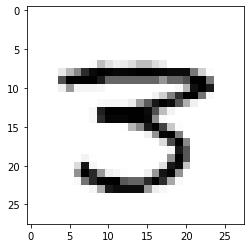

In [7]:
image_index = 3456
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, img_row, img_col, 1))
print(pred.argmax())

## Reading MNIST data set

In [8]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

## CNN Model : using Sequential model from Keras and TensorFlow

In [9]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Setting the float values so it is possible to get get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255    # Normalizing:The max RGB value is 255
x_test /= 255     # Normalizing:The max RGB value is 255


# Sequential Model and relevant layers

model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3), input_shape = input_shape))
"""
layer1: Conv2d layer which convolves 
the image using 64 filters each of size (3*3)
"""
model.add(MaxPooling2D(pool_size = (3, 3)))
"""
layer2: MaxPooling2D layer which picks 
the max value out of a matrix of size (3*3)
Maxpooling is one of the most common techniques
to reduce the spatial size of the representation,
to reduce the parameter counts which reduces the
computational complexity. In addition, pooling 
layers also helps with the overfitting problem. 
"""
model.add(Dropout(0.5))
"""
layer3: shows Dropout at a rate of 0.5
Dropout layers fight with the overfitting 
by disregarding some of the neurons while training
"""
model.add(Flatten())
"""
layer4: flatten the output obtained from layer3 
and this flatten output is passed to layer5
"""
model.add(Dense(128, activation = tf.nn.relu))
"""
layer5: shows a hidden layer of neural network containng 128 neurons
"""
model.add(Dense(10, activation = tf.nn.softmax))
"""
layer6: shows output layer having 10 neurons for 10 
classes of output that is using the softmax function
the final Dense layer must have 10 neurons since we 
have 10 number classes (0, 1, 2, …, 9)
"""

# Compiling and Fitting

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x = x_train,y = y_train, epochs = 2)

Epoch 1/2
60000/60000 [==============================] - 14s 232us/step - loss: 0.1960 - accuracy: 0.9405
Epoch 2/2
60000/60000 [==============================] - 14s 230us/step - loss: 0.0813 - accuracy: 0.9743


## Evalute Function

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0) 
print('Test loss =', test_loss) 
print('Test accuracy =', test_acc) 

Test loss = 0.09513569734748453
Test accuracy = 0.9689000248908997
